# Chapter 3: A Tour of Machine Learning Classifiers Using scikit-learn

## First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Using
the train_test_split function from scikit-learn’s model_selection module, we randomly split the
X and y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples).

The train_test_split function already shuffles the training datasets internally before splitting;
otherwise, all examples from class 0 and class 1 would have ended up in the training datasets,
and the test dataset would consist of 45 examples from class 2. Via the random_state parameter, we
provided a fixed random seed (random_state=1) for the internal pseudo-random number generator
that is used for shuffling the datasets prior to splitting. Using such a fixed random_state ensures that
our results are reproducible.


Lastly, we took advantage of the built-in support for stratification via stratify=y. In this context,
stratification means that the train_test_split method returns training and test subsets that have the
same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which
counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a perceptron via scikit-learn

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [6]:
y_pred=ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Number of examples: %d' % len(y_test))

Misclassified examples: 1
Number of examples: 45


Calculating accuracy:

In [7]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 0.978


Score option:

In [8]:
print(f"Accuracy: {ppn.score(X_test_std,y_test)}")

Accuracy: 0.9777777777777777


Function fpor plotting results from previous notebook( slightly modified )

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

Training perceptron moedl using standarized training data:

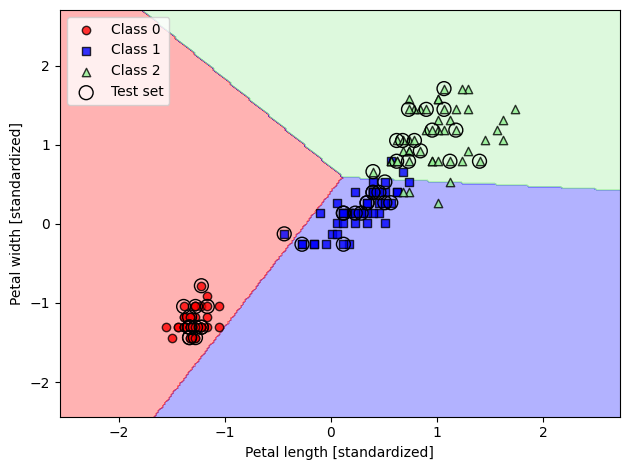

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

As we can see in the resulting plot, the three flower classes can’t be perfectly separated by a lineardecision boundary.

However, the pereptron algorithm never converges on datasets that are not perfectly linear separable.

In [11]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Linear perceptron classifier.
 |  
 |  The implementation is a wrapper around :class:`~sklearn.linear_model.SGDClassifier`
 |  by fixing the `loss` and `learning_rate` parameters as::
 |  
 |      SGDClassifier(loss="perceptron", learning_rate="constant")
 |  
 |  Other available parameters are described below and are forwarded to
 |  :class:`~sklearn.linear_model.SGDClassifier`.
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regulariz

## Modeling class probabilities via logistic regression

### Logistic regression intuition and conditional probabilities

Plotting sigmoid function in the range -7 to 7

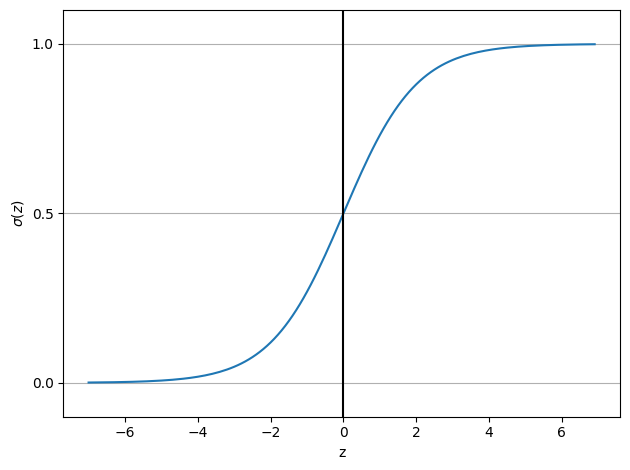

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # "get current axis"
ax.yaxis.grid(True)
plt.tight_layout() # Dopasowuje układ wykresu,
                   #   aby uniknąć nakładania się elementów
plt.show()

### Learning the weights of the logistic loss function

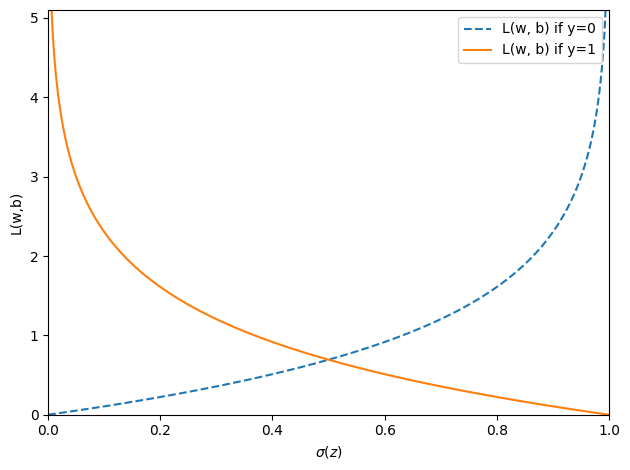

In [13]:
def loss_1(z):
  return - np.log(sigmoid(z))
def loss_0(z):
  return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250))) # ponizej

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

**Rola `np.clip(z, -250, 250)`**

Funkcja `np.exp(-z)` może zwrócić bardzo duże wartości, jeśli z jest zbyt małe lub zbyt duże.
Na przykład:

Jeśli z = -1000, to exp(1000) jest liczbą ogromną, co może prowadzić do przepełnienia.

Jeśli z = 1000, to exp(-1000) ≈ 0, co może prowadzić do niedokładności obliczeń.
Aby tego uniknąć, stosujemy:

`np.clip(z, -250, 250)`

Gdy z < -250, to ustawiamy z = -250 → exp(250) nie przekroczy limitu liczb.

Gdy z > 250, to ustawiamy z = 250 → exp(-250) ≈ 0, co zapobiega problemom numeryczny

When we fit a logistic regression model, we have to keep in mind that it only works for binary classification
tasks.

So, let’s consider only setosa and versicolor flowers (classes 0 and 1) and check that our implementation
of logistic regression works:


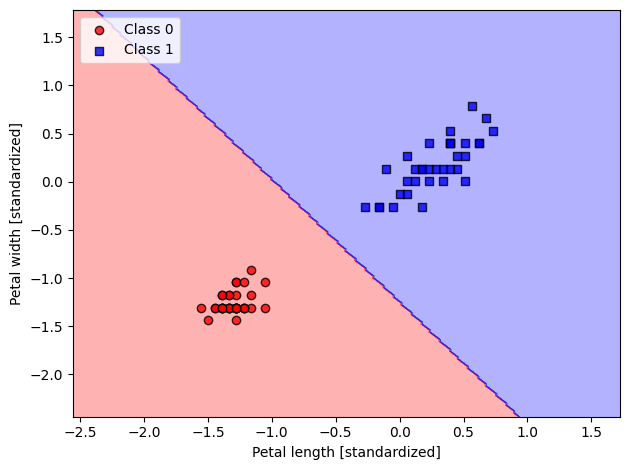

In [15]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

### Training a logistic regression model with scikit-learn

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


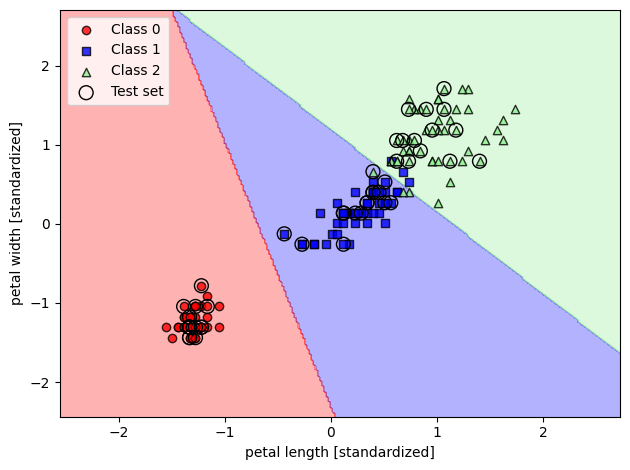

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr', random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The probability that training examples belong to a certain class can be computed using the predict_
proba method. For example, we can predict the probabilities of the first three examples in the test
dataset as follows:


In [17]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [18]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [19]:
#simpler ver
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

## Tackling overfitting via regularization

The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines, which will be the topic of the next section. The term C is
inversely proportional to the regularization parameter, 𝜆. Consequently, decreasing the value of the
inverse regularization parameter, C, means that we are increasing the regularization strength, which
we can visualize by plotting the L2 regularization path for the two weight coefficients:

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

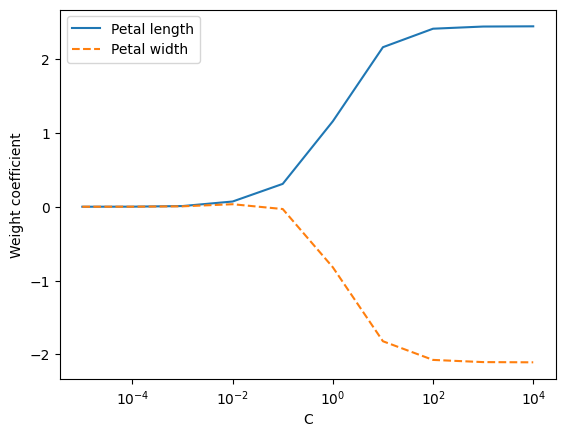

In [20]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Maximum margin classification with support vector machines

**The margin** is defined as the distance between the separating hyperplane (decision boundary) and
the training examples that are closest to this hyperplane, which are the so-called support vectors.

### Training SVM model

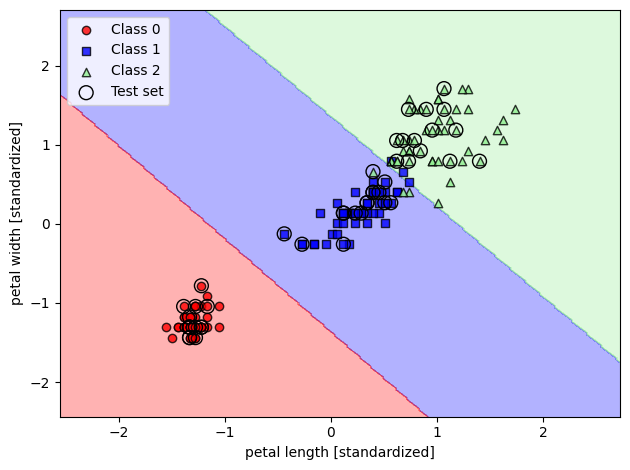

In [21]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Alternative implementations in scikit-learn
We could initialize the SGD version of the perceptron (loss='perceptron'), logistic regression
(loss='log'), and an SVM with default parameters (loss='hinge'), as follows:

In [22]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving non-linear problems using a kernel SVM

### Kernel methods for linearly inseparable data
Using the following code, we will create a simple dataset that has the form of an XOR gate using the
logical_or function from NumPy, where 100 examples will be assigned the class label 1, and 100
examples will be assigned the class label -1:

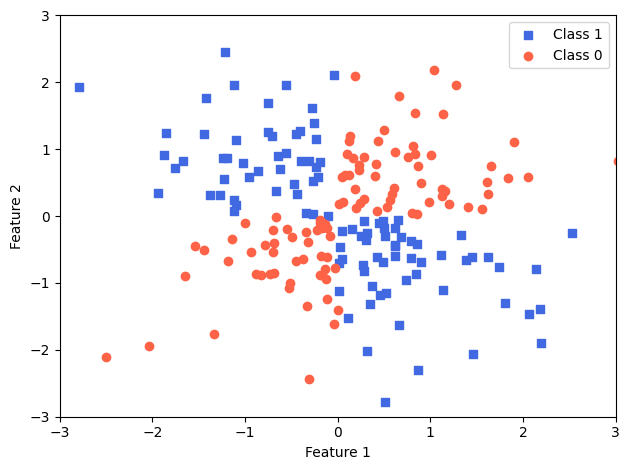

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

### Using the kernel trick to find separating hyperplanes in higher dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional
feature space via a mapping function, 𝜙 , and train a linear SVM model to classify the data in
this new feature space. Then, we could use the same mapping function, 𝜙𝜙 , to transform new, unseen
data to classify it using the linear SVM model.

One of the most widely used kernels is the radial basis function (RBF) kernel, which can simply be
called the Gaussian kernel.

Now that we have covered the big picture behind the kernel trick, let’s see if we can train a kernel
SVM that is able to draw a nonlinear decision boundary that separates the XOR data well. Here, we
simply use the SVC class from scikit-learn that we imported earlier and replace the kernel='linear'
parameter with kernel='rbf':

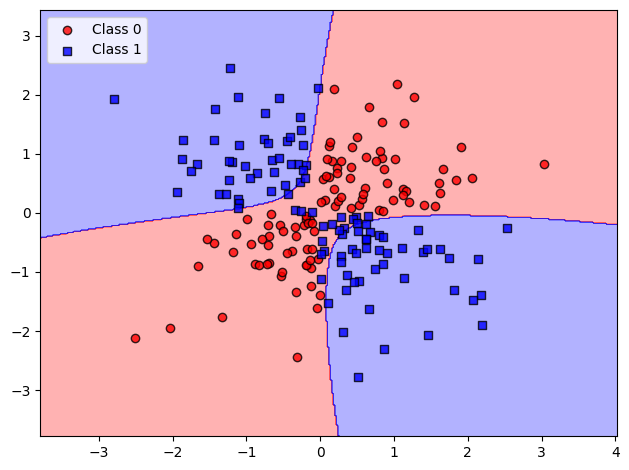

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0) # Pobawić się parametrami -wysokie C - overfitting
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The 𝛾 parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian
sphere. If we increase the value for 𝛾 , we increase the influence or reach of the training examples,
which leads to a tighter and bumpier decision boundary. To get a better understanding of 𝛾 , let’s apply
an RBF kernel SVM to our Iris flower dataset:

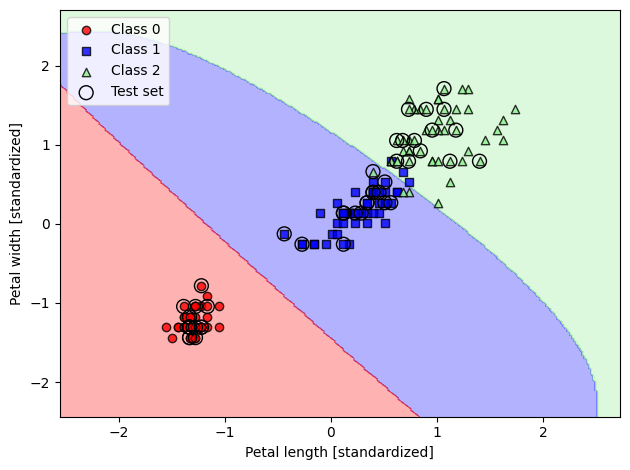

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Now, let’s increase the value of 𝛾 and observe the effect on the decision boundary:

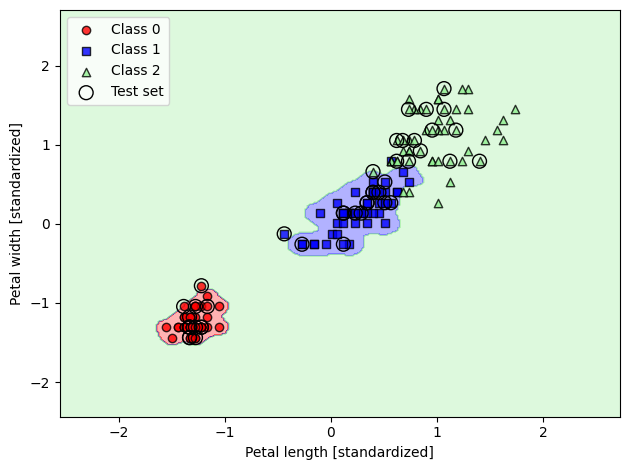

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision tree learning

### Visualizing entropy values for different class distributions

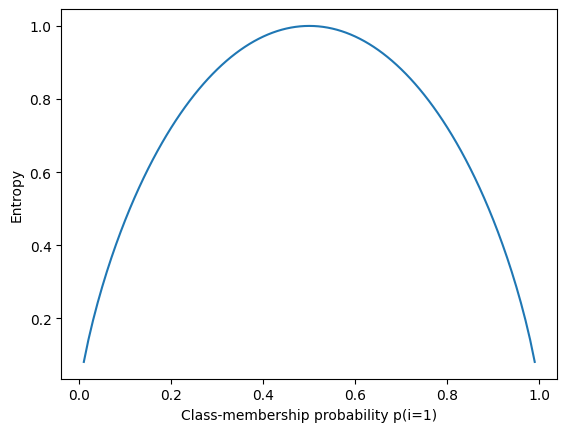

In [27]:
def entropy(p):
  return - p * np.log2(p) - (1-p) * np.log2((1-p))
x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

### Visualizing comparision of 3 different impurity criteria
Gini impurity (IG), entropy (IH), and the classification error (IE).

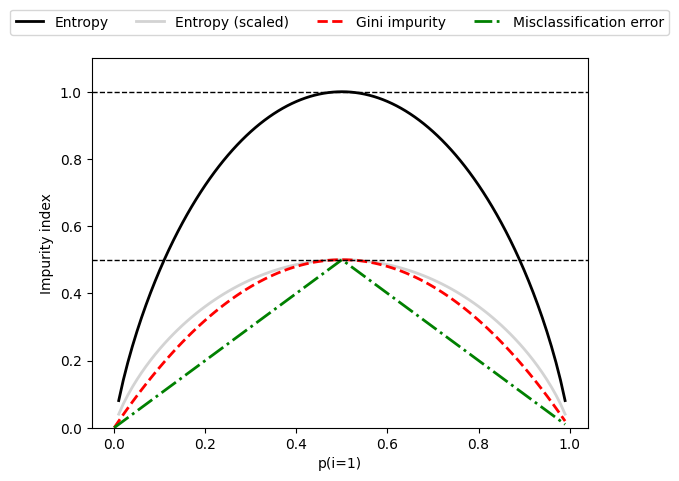

In [28]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()

## Building a decision tree

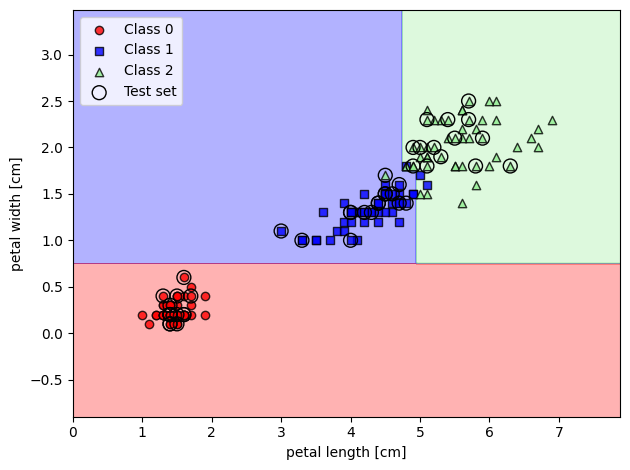

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after training
via the following code:

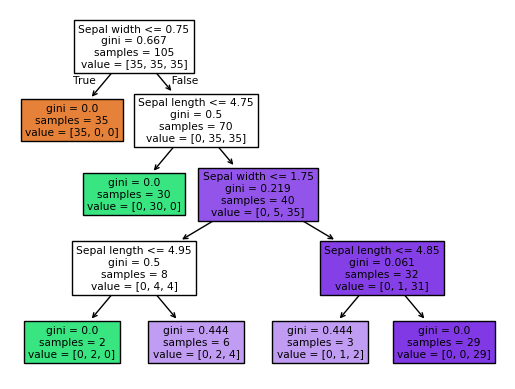

In [31]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,feature_names=feature_names,filled=True)
plt.show()

## Combining weak to strong learners via random forests

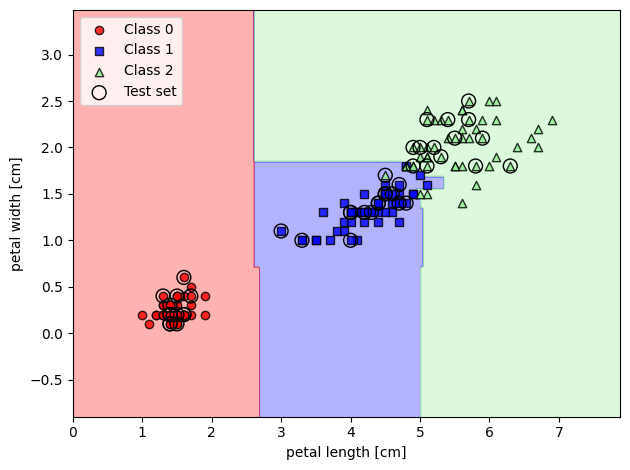

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-nearest neighbors - a lazy learning algorithm

KNN model using Euclidean distance metric:

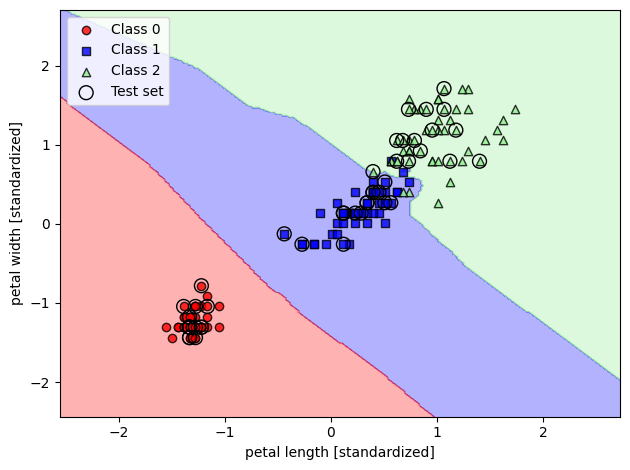

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()